$$Diego \space Castillo \space Reyes$$
<h1 align="center">Codificación en amplitud</h1>
Input: N elementos random

Output: Codificación en amplitud

In [1]:
import pennylane as qml
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# ask for the number of elements
n = int(input("Enter the number of elements: "))

In [3]:
np.random.seed(3)

# array with n random elements
array = np.round(np.random.uniform(0, 10, size=n), 3)

print(array)

[5.508 7.081 2.909 5.108 8.929 8.963 1.256 2.072 0.515 4.408]


In [4]:
# normalize a element
def normalize(x, array):
    return np.sqrt(x / np.sum(array))

In [5]:
# if the num of qubits have decimals we go up to the next int number
aux = np.log2(n)
qubits = int(aux) + 1 if aux > int(aux) else int(aux)

# define the device
dev = qml.device("default.qubit", wires=qubits)

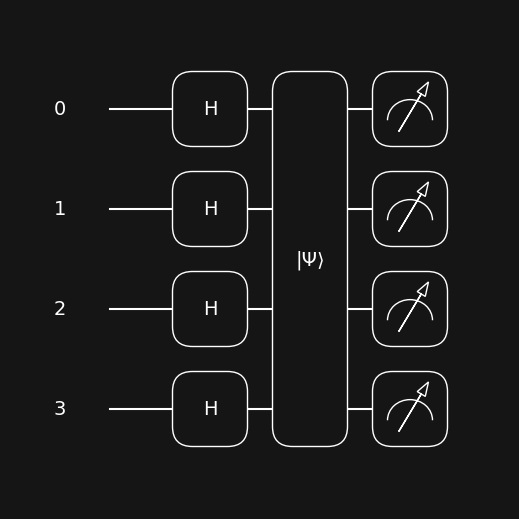

In [6]:
# define the circuit
@qml.qnode(dev)
def circuit(array):
    # create the superposition
    for i in range(qubits):
        qml.Hadamard(wires=i)

    normalizedArray = np.zeros(2**qubits)
    for i, element in enumerate(array):
        normalizedArray[i] = normalize(element, array)
    # print(normalizedArray.round(3))

    qml.AmplitudeEmbedding(normalizedArray, wires=range(qubits))

    return qml.state()

# draw the circuit
qml.drawer.use_style("black_white_dark")
fig, ax = qml.draw_mpl(circuit)(array)
plt.show()

In [7]:
# run the circuit
result = circuit(array)

print(result.round(3))

[ 0.   +0.j -0.   +0.j  0.   +0.j -0.003+0.j -0.   +0.j  0.162+0.j
 -0.05 +0.j  0.405+0.j -0.198+0.j  0.403+0.j  0.318+0.j  0.318+0.j
  0.318+0.j  0.318+0.j  0.318+0.j  0.318+0.j]


In [8]:
# check if the state vector is normalized
sum = 0
for e in result:
    sum += np.abs(e)**2

print(f"Suma de los elementos del vector: {sum.round(3)}")

Suma de los elementos del vector: 1.0
